In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from scipy import stats
import seaborn as sns

In [3]:
df = pd.read_csv('RESULTS_DataWiz9_CumCondCount=34_2024-01-19.csv')
df = df.rename(columns=lambda x: x.replace('.', '_'))


df.head()

In [5]:
model = smf.ols('Browse_Time ~ Prev_Length * Match_Score * Tile_Size * Prev_Type', data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Browse_Time   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     226.0
Date:                Fri, 19 Jan 2024   Prob (F-statistic):          3.80e-109
Time:                        21:19:23   Log-Likelihood:                -1591.1
No. Observations:                 900   AIC:                             3190.
Df Residuals:                     896   BIC:                             3209.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            52.1933      5.067     10.301      0.000      42.249      62.138
Prev_Length                          -0.7293      0.078     -9.373      0.000      -0.882      -0.577
Match_Score                          -0.4531      0.059     -7.639      0.000      -0.569      -0.337
Prev_Length:Match_Score               0.0083      0.001      9.133      0.000       0.007       0.010
Tile_Size                            10.4387      1.013     10.301      0.000       8.450      12.428
Prev_Length:Tile_Size                -0.1459      0.016     -9.373      0.000      -0.176      -0.115
Match_Score:Tile_Size                -0.0906      0.012     -7.639      0.000      -0.114      -0.067
Prev_Length:Match_Score:Tile_Size     0.0017      0.000      9.133      0.000       0.001       0.002
==============================================================================
Omnibus:                       13.627   Durbin-Watson:                   2.105
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                8.236
Skew:                          -0.003   Prob(JB):                       0.0163
Kurtosis:                       2.531   Cond. No.                     5.67e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.91e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [6]:
significant_factors = model.pvalues[model.pvalues <= 0.05].index
print("Factors with significance level below 0.05:", list(significant_factors))

Factors with significance level below 0.05: ['Intercept', 'Prev_Length', 'Match_Score', 'Prev_Length:Match_Score', 'Tile_Size', 'Prev_Length:Tile_Size', 'Match_Score:Tile_Size', 'Prev_Length:Match_Score:Tile_Size']


In [7]:
model_red = smf.ols('Browse_Time ~ Prev_Type + Match_Score + Prev_Length:Match_Score', data = df).fit()
model_red.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Browse_Time   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     269.0
Date:                Fri, 19 Jan 2024   Prob (F-statistic):           3.02e-92
Time:                        21:19:23   Log-Likelihood:                -1633.2
No. Observations:                 900   AIC:                             3272.
Df Residuals:                     897   BIC:                             3287.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   4.9787      0.334     14.923      0.000       4.324       5.633
Match_Score                 0.1029      0.008     13.485      0.000       0.088       0.118
Prev_Length:Match_Score    -0.0002      0.000     -1.810      0.071      -0.000    1.54e-05
==============================================================================
Omnibus:                       20.908   Durbin-Watson:                   2.391
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.668
Skew:                           0.074   Prob(JB):                      0.00293
Kurtosis:                       2.462   Cond. No.                     3.72e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.72e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
t = 2 * (model.llf - model_red.llf)
pv = stats.chi2.sf(t, df = 12)
print("t = ", t)
print("p-value = ", pv)

t =  84.18425207238079
p-value =  6.529448618996065e-13


/Users/MaxSivolella/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/MaxSivolella/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/MaxSivolella/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 0, 'Match_Score')

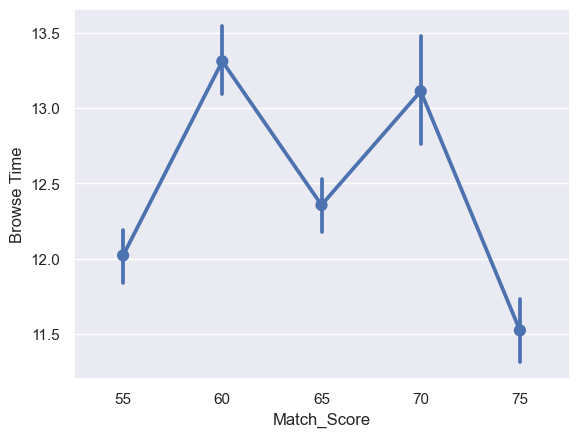

In [9]:
# Main effect of Prev_Length (x1)
sns.set_theme(style="darkgrid")
fig1 = sns.pointplot(x="Prev_Length", y="Browse_Time", data=df)
fig1.set_ylabel("Browse Time")
fig1.set_xlabel("Match_Score")

/Users/MaxSivolella/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/MaxSivolella/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/MaxSivolella/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 0, 'Match_Score')

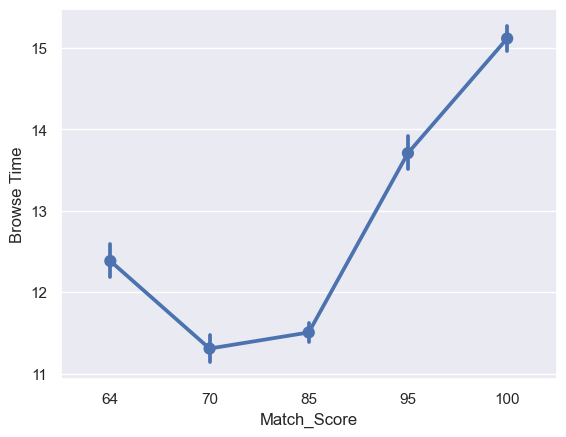

In [11]:
# Main effect of Prev_Length (x1)
sns.set_theme(style="darkgrid")
fig1 = sns.pointplot(x="Match_Score", y="Browse_Time", data=df)
fig1.set_ylabel("Browse Time")
fig1.set_xlabel("Match_Score")

Text(0.5, 25.28125, 'Prev_Type')

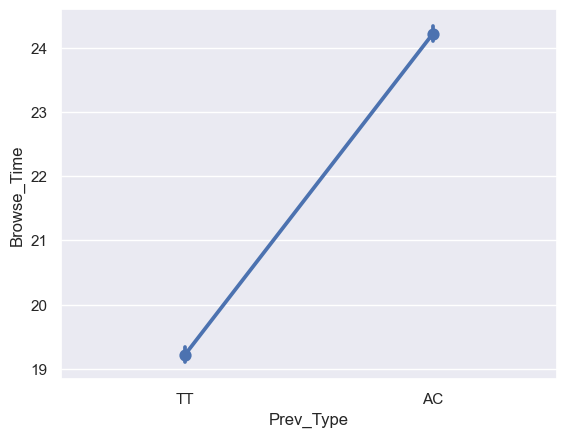

In [ ]:
# Main effect of Prev_Length (x1)
sns.set_theme(style="darkgrid")
fig1 = sns.pointplot(x="Prev_Type", y="Browse_Time", data=df)
fig12.set_ylabel("Browse Time")
fig12.set_xlabel("Prev_Type")

Text(0.5, 25.28125, 'Tile_Size')

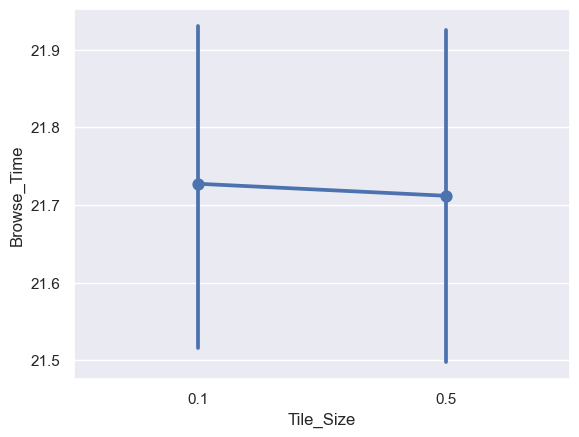

In [ ]:
# Main effect of Tile_Size
sns.set_theme(style="darkgrid")
fig1 = sns.pointplot(x="Tile_Size", y="Browse_Time", data=df)
fig12.set_ylabel("Browse Time")
fig12.set_xlabel("Tile_Size")
# fig1.set_ylim(0.01, 0.04)

Text(0.5, 0, 'Prev_Length(x1)')

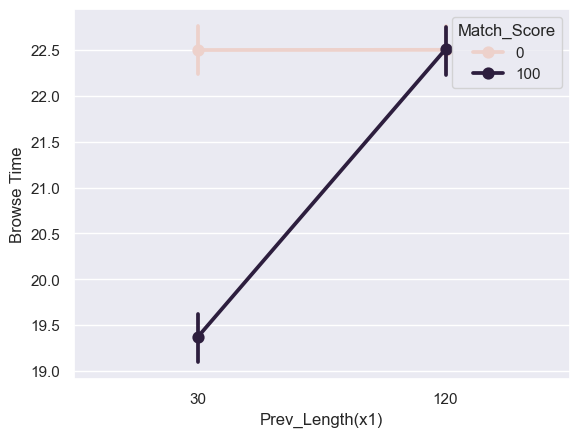

In [ ]:
# Interaction between Prev_Length and Match_Score
sns.set_theme(style="darkgrid")
fig12 = sns.pointplot(x="Prev_Length", hue="Match_Score", y="Browse_Time", data=df)
fig12.set_ylabel("Browse Time")
fig12.set_xlabel("Prev_Length")
# fig12.set_ylim(0.01, 0.04)

In [49]:
import pandas as pd
import numpy as np

def proc_col(col):
    """Encodes a pandas column with values between 0 and n-1.
    where n = number of unique values
    """
    uniq = col.unique()
    name2idx = {o: i for i, o in enumerate(uniq)}
    return name2idx, np.array([name2idx[x] for x in col]), len(uniq)


def encode_data(df):
    """Encodes rating data with continous user and movie ids using
    the helpful fast.ai function from above.

    Arguments:
      train_csv: a csv file with columns user_id,movie_id,rating

    Returns:
      df: a dataframe with the encode data
      num_users
      num_movies

    """
    # BEGIN SOLUTION
    user2idx, df['user_id'], num_users = proc_col(df['user_id'])
    movie2idx, df['movie_id'], num_movies = proc_col(df['movie_id'])
    # END SOLUTION
    return df, num_users, num_movies

# Sample data
data = {
    'user_id': ['user1', 'user2', 'user3', 'user1', 'user2'],
    'movie_id': ['movie1', 'movie2', 'movie1', 'movie3', 'movie2'],
    'rating': [4, 3, 5, 2, 4]
}

# Create DataFrame
df = pd.DataFrame(data)

# Function call
encoded_df, num_users, num_movies = encode_data(df)

# Display encoded DataFrame and counts
print("Encoded DataFrame:")
print(encoded_df)
print("\nNumber of Unique Users:", num_users)
print("Number of Unique Movies:", num_movies)


{'user1': 0, 'user2': 1, 'user3': 2}
Encoded DataFrame:
   user_id  movie_id  rating
0        0         0       4
1        1         1       3
2        2         0       5
3        0         2       2
4        1         1       4

Number of Unique Users: 3
Number of Unique Movies: 3


In [63]:
def encode_new_data(df_val, df_train):
    """Encodes df_val with the same encoding as df_train.
    
    Arguments:
      df_val: DataFrame to be encoded
      df_train: DataFrame used for encoding reference
    
    Returns:
      df_val: DataFrame with the same encoding as df_train
    """

    # Creating mapping dictionaries for user and movie IDs from training data
    user_mapping = {id_val: idx for idx, id_val in enumerate(df_train['user_id'].unique())}
    movie_mapping = {id_val: idx for idx, id_val in enumerate(df_train['movie_id'].unique())}

    # Applying mapping to df_val DataFrame
    df_val['user_id'] = df_val['user_id'].map(user_mapping)
    df_val['movie_id'] = df_val['movie_id'].map(movie_mapping)

    return df_val, user_mapping


This is a very similar prediction to what was observed at the _true_ optimum. So given the convenience of a 50\% discount for 2 days, we might recommend that discount as a _practical_ optimum for which we expect a booking rate of roughly 80\%.

In [ ]:
df = pd.read_csv('RESULTS_DataWiz9_CumCondCount=25_2024-01-19.csv')
df.head(3)

,Prev.Length,Match.Score,Tile.Size,Prev.Type,Browse.Time
0,50,35,0.2,TT,20.676344
1,100,35,0.2,TT,18.172784
2,50,85,0.2,TT,12.665551


In [ ]:
df.drop(columns=['Tile.Size', 'Prev.Type'], inplace=True)

In [ ]:
df = df.rename(columns=lambda x: x.replace('.', '_'))

In [ ]:
df.head(3)

,Prev_Length,Match_Score,Browse_Time
0,50,35,20.676344
1,100,35,18.172784
2,50,85,12.665551


In [ ]:
model = smf.ols('Browse_Time ~ Prev_Length + Match_Score + Prev_Length:Match_Score + I(Prev_Length**2) + I(Match_Score**2)', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Browse_Time   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     948.0
Date:                Thu, 18 Jan 2024   Prob (F-statistic):               0.00
Time:                        21:43:00   Log-Likelihood:                -1330.8
No. Observations:                 900   AIC:                             2674.
Df Residuals:                     894   BIC:                             2702.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [ ]:
beta0 = model.params[0]
beta1 = model.params[1]
beta2 = model.params[2]
beta12 = model.params[3]
beta11 = model.params[4]
beta22 = model.params[5]

/var/folders/9j/yz2b3p150qs_j0s6v9cznbk80000gn/T/ipykernel_34634/171186982.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta0 = model.params[0]
/var/folders/9j/yz2b3p150qs_j0s6v9cznbk80000gn/T/ipykernel_34634/171186982.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta1 = model.params[1]
/var/folders/9j/yz2b3p150qs_j0s6v9cznbk80000gn/T/ipykernel_34634/171186982.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta2 =

In [ ]:
df.groupby(['Prev_Length','Match_Score']).mean()

Browse_Time
Prev_Length Match_Score             
40          60             15.853765
50          35             19.336909
            85             12.649040
75          25             19.763508
            60             12.617572
            95             14.767885
100         35             18.080475
            85             17.018322
110         60             16.529218

In [ ]:
b = np.matrix([beta1, beta2]).transpose()
B = np.matrix([[beta11, 0.5*beta12], [0.5*beta12, beta22]])
x_s = -0.5* np.matmul(np.linalg.inv(B), b)
print("browse time is minimized when x1=", x_s[0], "and x2=", x_s[1])

browse time is minimized when x1= [[66.67636355]] and x2= [[72.33975196]]


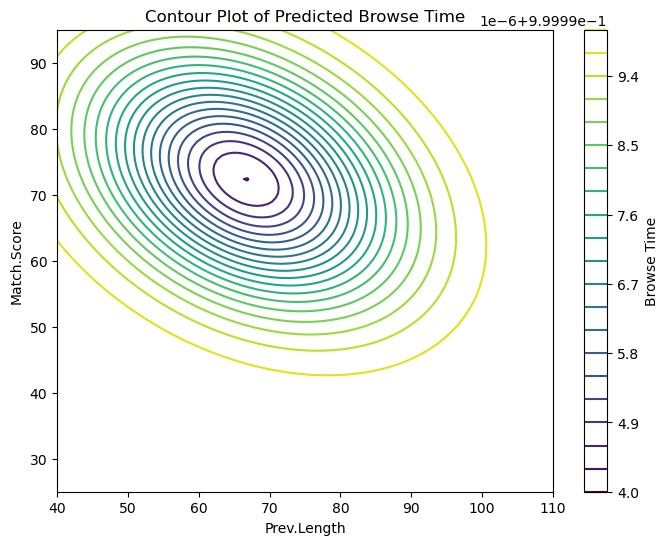

In [ ]:
# Generate meshgrid for Prev.Length and Match.Score
x1, x2 = np.meshgrid(np.linspace(df['Prev_Length'].min(), df['Prev_Length'].max(), 100),
                     np.linspace(df['Match_Score'].min(), df['Match_Score'].max(), 100))

# Calculate predicted browse time using the regression model parameters
eta = beta0 + beta1*x1 + beta2*x2 + beta12*x1*x2 + beta11*x1**2 + beta22*x2**2
pi = np.exp(eta) / (1 + np.exp(eta))

# Create contour plot
plt.figure(figsize=(8, 6))
contour = plt.contour(x1, x2, pi, levels=20, cmap='viridis')
plt.colorbar(contour, label='Browse Time')
plt.xlabel('Prev.Length')
plt.ylabel('Match.Score')
plt.title('Contour Plot of Predicted Browse Time')
plt.show()


                            OLS Regression Results                            
Dep. Variable:            Browse_Time   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     464.7
Date:                Thu, 18 Jan 2024   Prob (F-statistic):          1.04e-245
Time:                        21:43:00   Log-Likelihood:                -1268.3
No. Observations:                 900   AIC:                             2549.
Df Residuals:                     894   BIC:                             2577.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

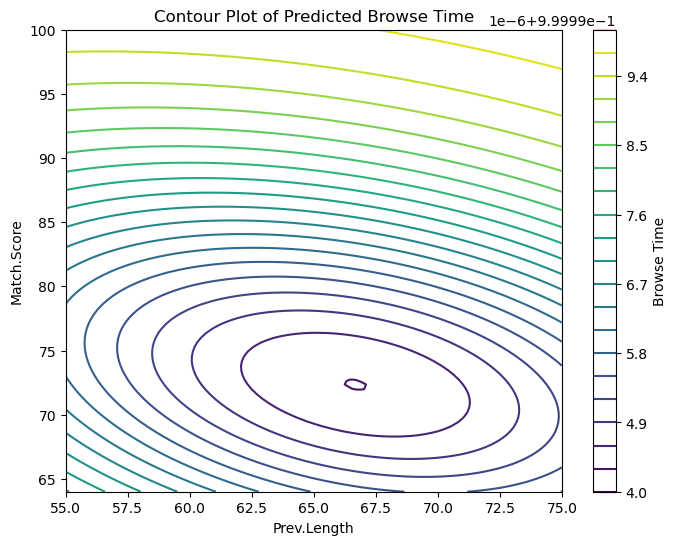

In [ ]:
df = pd.read_csv('RESULTS_DataWiz9_CumCondCount=34_2024-01-19.csv')
df.drop(columns=['Tile.Size', 'Prev.Type'], inplace=True)
df = df.rename(columns=lambda x: x.replace('.', '_'))
model = smf.ols('Browse_Time ~ Prev_Length + Match_Score + Prev_Length:Match_Score + I(Prev_Length**2) + I(Match_Score**2)', data=df).fit()
print(model.summary())

import numpy as np
import matplotlib.pyplot as plt

# Generate meshgrid for Prev.Length and Match.Score
x1, x2 = np.meshgrid(np.linspace(df['Prev_Length'].min(), df['Prev_Length'].max(), 100),
                     np.linspace(df['Match_Score'].min(), df['Match_Score'].max(), 100))

# Calculate predicted browse time using the regression model parameters
eta = beta0 + beta1*x1 + beta2*x2 + beta12*x1*x2 + beta11*x1**2 + beta22*x2**2
pi = np.exp(eta) / (1 + np.exp(eta))

# Create contour plot
plt.figure(figsize=(8, 6))
contour = plt.contour(x1, x2, pi, levels=20, cmap='viridis')
plt.colorbar(contour, label='Browse Time')
plt.xlabel('Prev.Length')
plt.ylabel('Match.Score')
plt.title('Contour Plot of Predicted Browse Time')
plt.show()


In [ ]:
b = np.matrix([beta1, beta2]).transpose()
B = np.matrix([[beta11, 0.5*beta12], [0.5*beta12, beta22]])
x_s = -0.5* np.matmul(np.linalg.inv(B), b)
print("browse time is minimized when x1=", x_s[0], "and x2=", x_s[1])

browse time is minimized when x1= [[66.67636355]] and x2= [[72.33975196]]


In [ ]:
df.groupby(['Prev_Length','Match_Score']).mean()

Browse_Time
Prev_Length Match_Score             
55          85             12.021428
60          70             12.057055
            100            14.568917
65          64             12.384258
            85             10.976490
            95             13.710069
70          70             10.560530
            100            15.667344
75          85             11.522679

In [ ]:
df = pd.read_csv('RESULTS_DataWiz9_CumCondCount=40_2024-01-19.csv')
df.drop(columns=['Tile.Size', 'Prev.Type'], inplace=True)
df = df.rename(columns=lambda x: x.replace('.', '_'))

df.groupby(['Prev_Length','Match_Score']).mean()

Browse_Time
Prev_Length Match_Score             
65          72             10.770011
70          75             10.518511
            80             10.718295
75          75             10.105869
            80             10.536978
80          75             10.311506